In [1]:
from pipeline.data import TriangleSquareDataset
import matplotlib.pyplot as plt

In [2]:
import torch

'NVIDIA A100 80GB PCIe'

In [2]:
dataset = TriangleSquareDataset(num_samples=50, image_size=32, max_size=15)

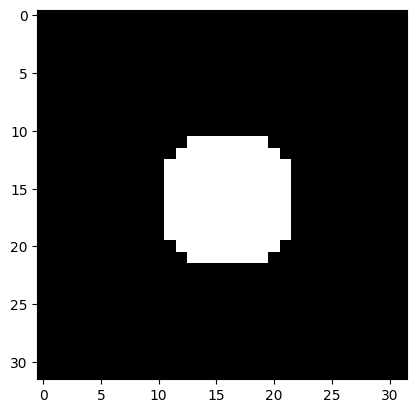

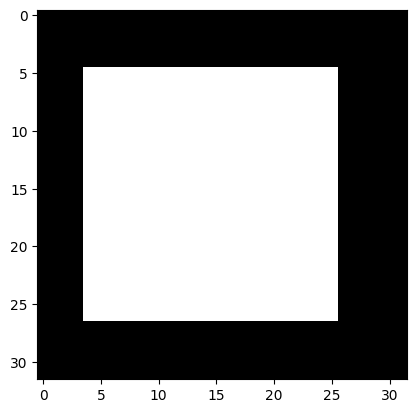

tensor([0.])


In [4]:
(img1, img2), label = next(iter(dataset))

plt.imshow(img1.squeeze().permute(1, 2, 0))
plt.show()
plt.imshow(img2.squeeze().permute(1, 2, 0))
plt.show()

print(label)


In [5]:
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

import numpy as np
import matplotlib.pyplot as plt

from pipeline.data import TriangleSquareDataModule
from pipeline.modules import SiameseModelsCreator

In [6]:
with initialize(version_base=None, config_path='configs'):
    cfg = compose(config_name='train')
    print(cfg)

{'data': {'num_samples': 1000, 'image_size': 32, 'max_size': 15, 'p_rotation': 0.0}, 'model': {'encoder': 'resnet18', 'pretrained': True, 'losses': {'loss': 'binary_cross_entropy'}}, 'hyp': {'batch_size': 32, 'max_epochs': 100, 'mask_threshold': 0.5, 'save_top_k': 5, 'nominal_batch_size': 32, 'precision': 'bf16-mixed', 'log_every_n_steps': 1, 'n_devices': 1, 'strategy': 'auto', 'optim': {'optimizer_type': 'adam', 'lr0': 0.001, 'momentum': 0.937, 'weight_decay': 0.0005}, 'lr_scheduler': {'scheduler_type': 'cosine_annealing', 'eta_min': 1e-05, 't_max': None}}}


In [7]:
n_cpu = os.cpu_count()
dataset = TriangleSquareDataModule(cfg.data, batch_size=cfg.hyp.batch_size, num_workers=n_cpu)
dataset.setup('fit')

In [8]:
iter_dataset = iter(dataset.train_dataloader())
imgs, labels = next(iter_dataset)

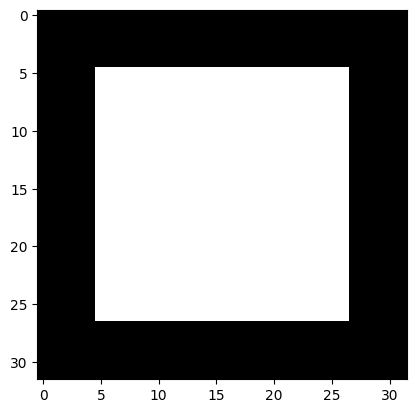

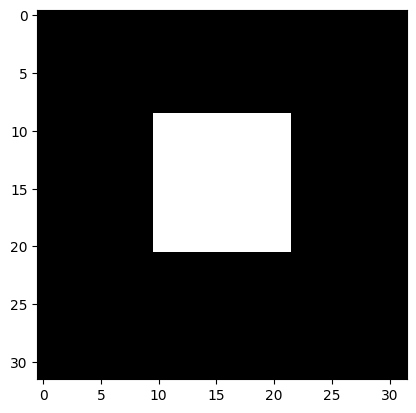

tensor([1.])


In [9]:
idx = np.random.randint(0, len(labels)-1)

plt.imshow(imgs[0][idx].squeeze().permute(1, 2, 0))
plt.show()
plt.imshow(imgs[1][idx].squeeze().permute(1, 2, 0))
plt.show()

print(labels[idx])

In [10]:
model_creator = SiameseModelsCreator(**cfg.model)

/Users/im/miniconda/envs/test_prj/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/im/miniconda/envs/test_prj/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
imgs[0].shape

torch.Size([32, 3, 32, 32])

In [12]:
labels.shape

torch.Size([32, 1])